## **Problem Statement**

### **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


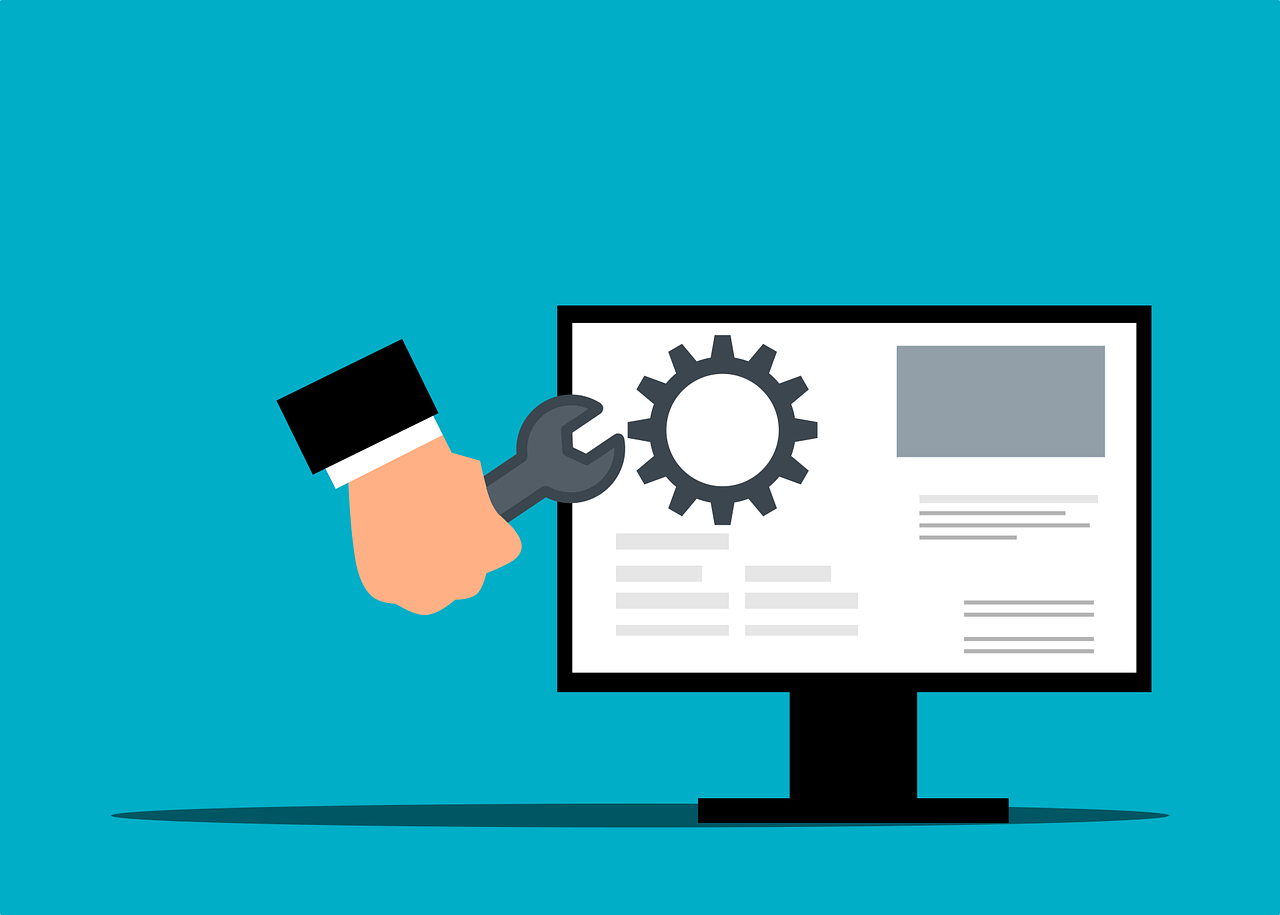

### **Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


## **Installing and Importing Necessary Libraries and Dependencies**

In [ ]:
!pip install fastapi kaleido python-multipart uvicorn cohere openai tiktoken


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensi

In [ ]:
!pip install --upgrade tensorflow-probability


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.22.0
    Uninstalling tensorflow-probability-0.22.0:
      Successfully uninstalled tensorflow-probability-0.22.0


In [ ]:
!pip install "typing-extensions>=4.8.0" --upgrade

In [ ]:
!nvcc --version
!which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
/usr/local/cuda/bin/nvcc


In [ ]:
!nvidia-smi

Sun Jan 28 18:03:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 103.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 264.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 264.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 294.5 MB/s eta 0:00:00


In [ ]:
# Install the hugging face hub
!pip install huggingface_hub -q

In [ ]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

## **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Complete the code to read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Week14_NLP/Project6/support_ticket_data.csv")

## **Data Overview**

In [ ]:
# Write the code to check the first 5 rows of the data
data.head(5)

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,"Urgent help required, my laptop refuses to sta..."
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [ ]:
# Write the code to check the shape of the data
data.shape

(21, 2)

In [ ]:
# Write the code to check for missing values in the data
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

## **Model Building**

### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id = "TheBloke/Llama-2-13B-chat-GGUF",    # complete the code to mentioned the repo_id
    filename = "llama-2-13b-chat.Q5_K_M.gguf"    # complete the code to mentioned the filename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
# Adjust these parameters based on your T4 GPU capabilities
n_threads = 2  # Number of CPU threads
n_batch = 512    # Batch size; try different values for optimization
n_gpu_layers = 43  # Number of layers processed on the GPU; adjust based on VRAM
n_ctx = 4096   # Context window size; adjust based on model requirements

In [ ]:
# complete the code to create an instance of the 'Llama' class with specified parameters
print("Loading model...")
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=n_threads,  # CPU cores
    n_batch=n_batch,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=n_gpu_layers,  # Change this value based on your model and your GPU VRAM pool.
    n_ctx=n_ctx,  # Context window
)
print("Model loaded successfully.")

Loading model...
Model loaded successfully.


AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 
Model metadata: {'tokenizer.ggml.unknown_token_id': '0', 'tokenizer.ggml.eos_token_id': '2', 'general.architecture': 'llama', 'llama.context_length': '4096', 'general.name': 'LLaMA v2', 'llama.embedding_length': '5120', 'llama.feed_forward_length': '13824', 'llama.attention.layer_norm_rms_epsilon': '0.000010', 'llama.rope.dimension_count': '128', 'llama.attention.head_count': '40', 'tokenizer.ggml.bos_token_id': '1', 'llama.block_count': '40', 'llama.attention.head_count_kv': '40', 'general.quantization_version': '2', 'tokenizer.ggml.model': 'llama', 'general.file_type': '17'}


### Defining Model Response Parameters

In [ ]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0.01,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

* max_tokens: This parameter specifies the maximum number of tokens that the model should generate in response to the prompt.

* temperature: This parameter controls the randomness of the generated response. A higher temperature value will result in a more random response, while a lower temperature value will result in a more predictable response.

* top_p: This parameter controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection. A higher value of top_p will result in a more diverse response, while a lower value will result in a less diverse response.

* repeat_penalty: This parameter controls the penalty for repeating tokens in the generated response. A higher value of repeat_penalty will result in a lower probability of repeating tokens, while a lower value will result in a higher probability of repeating tokens.

* top_k: This parameter controls the maximum number of most-likely next tokens to consider when generating the response at each step.

* stop: This parameter is a list of tokens that are used to dynamically stop response generation whenever the tokens in the list are encountered.

* echo: This parameter controls whether the input (prompt) to the model should be returned in the model response.

## **Task 1: Ticket Categorization**

In [ ]:
# create a copy of the data
data_1 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_1 = """
    Categorize the ticket categories in one of the following categories: Hardware issues, Technical issues, Data recovery, User issues, Other
"""

In [ ]:
data_1['llama_response'] = data_1['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_1,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_1.head(10)

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"Sure! Based on the information provided, I wo..."
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","Sure! Based on the information provided, I wo..."
2,ST2023-008,I've accidentally deleted essential work docum...,"Sure! Based on your description, I would cate..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Based on the information provided, I would ca..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Sure! Based on your description, I would cate..."
5,ST2023-011,I'm locked out of my online banking account an...,"Based on the information provided, I would ca..."
6,ST2023-012,"My computer's performance is sluggish, severel...","Based on the information provided, I would ca..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,"Sure! Based on your description, I would cate..."
8,ST2023-014,My external hard drive isn't being recognized ...,"Sure! Based on the information provided, I wo..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,"Sure! Based on the information provided, I wo..."


In [ ]:

def extract_category(model_response):
    response_lower = model_response.lower()
    if 'technical issue' in response_lower:
        return 'Technical issues'
    elif 'technical issues' in response_lower:
        return 'Technical issues'
    elif 'hardware issues' in response_lower:
        return 'Hardware issues'
    elif 'hardware issue' in response_lower:
        return 'Hardware issues'
    elif 'data recovery' in response_lower:
        return 'Data recovery'
    elif 'user issues' in response_lower:
        return 'User issues'

data_1['Category'] = data_1['llama_response'].apply(extract_category)
data_1['Category'].head()


0    Technical issues
1     Hardware issues
2       Data recovery
3    Technical issues
4     Hardware issues
Name: Category, dtype: object

In [ ]:
data_1['Category'] = data_1['llama_response'].apply(extract_category)
data_1['Category'].head()

0    Technical issues
1     Hardware issues
2       Data recovery
3    Technical issues
4     Hardware issues
Name: Category, dtype: object

In [ ]:
final_data_1 = data_1.drop(['llama_response'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Technical issues
1,ST2023-007,"Urgent help required, my laptop refuses to sta...",Hardware issues
2,ST2023-008,I've accidentally deleted essential work docum...,Data recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical issues
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues


## **Task 2: Ticket Categorization and Returning Structured Output**

In [ ]:
# create a copy of the data
data_2 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_2 = """Categorize the ticket categories in one of the following categories: Hardware issues, Technical issues, Data recovery, User issues, Other.
The output should be in the form of a JSON with
Category (as string)
Do not include any other text in the output except the JSON
"""



In [ ]:
data_2['llama_response'] = data_2['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_2,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_2.head(5)


,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issues""\n ..."
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n ""Category"": ""Hardware Issues""\n }"
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery""\n }"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issues""\n ..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware Issues""\n }"


In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')#

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}





In [ ]:
data_2['llama_response_parsed'] = data_2['llama_response'].apply(extract_json_data)
data_2['llama_response_parsed'].head()

0    {'Category': 'Technical Issues'}
1     {'Category': 'Hardware Issues'}
2       {'Category': 'Data Recovery'}
3    {'Category': 'Technical Issues'}
4     {'Category': 'Hardware Issues'}
Name: llama_response_parsed, dtype: object

In [ ]:
llama_response_parsed_df_2 = pd.json_normalize(data_2['llama_response_parsed'])
llama_response_parsed_df_2.head()

,Category
0,Technical Issues
1,Hardware Issues
2,Data Recovery
3,Technical Issues
4,Hardware Issues


In [ ]:
data_with_parsed_model_output_2 = pd.concat([data_2, llama_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issues""\n ...",{'Category': 'Technical Issues'},Technical Issues
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n ""Category"": ""Hardware Issues""\n }",{'Category': 'Hardware Issues'},Hardware Issues
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery""\n }",{'Category': 'Data Recovery'},Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issues""\n ...",{'Category': 'Technical Issues'},Technical Issues
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware Issues""\n }",{'Category': 'Hardware Issues'},Hardware Issues


In [ ]:
final_data_2 = data_with_parsed_model_output_2.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues
1,ST2023-007,"Urgent help required, my laptop refuses to sta...",Hardware Issues
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues


## **Task 3: Ticket Categorization, Creating Tags, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_3 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_3 = """Categorize the ticket categories in one of the following categories: Hardware issues, Technical issues, Data recovery, User issues, Other.
The output should be in the form of a JSON with
1. Category (as string)
2. Tags (as list of string) based on keywords in the support ticket text
Do not include any other text in the output except the JSON
"""


In [ ]:
data_3['llama_response'] = data_3['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_3,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_3.head(5)


,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n""category"": ""Technical Issues"",\n""tags"": [..."
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n ""category"": ""Hardware Issues"",\n ..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Hardware Issues"",\n ..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here's the output in the requested form...


In [ ]:
data_3['llama_response_parsed'] = data_3['llama_response'].apply(extract_json_data)
data_3['llama_response_parsed'].head()

0    {'category': 'Technical Issues', 'tags': ['int...
1    {'category': 'Hardware Issues', 'tags': ['lapt...
2    {'Category': 'Data Recovery', 'Tags': ['delete...
3    {'Category': 'Hardware Issues', 'Tags': ['Wi-F...
4    {'Category': 'Hardware Issues', 'Tags': ['batt...
Name: llama_response_parsed, dtype: object

In [ ]:
llama_response_parsed_df_3 = pd.json_normalize(data_3['llama_response_parsed'])
llama_response_parsed_df_3.head()

,Category,Tags
0,Technical issues,"[internet connection, slow speed, disconnections]"
1,Hardware issues,"[laptop, startup, presentation]"
2,Data Recovery,"[data loss, essential documents, substantial d..."
3,Technical issues,"[Wi-Fi signal strength, persistent weak signal..."
4,Hardware issues,"[battery, smartphone]"


In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, llama_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,"{\n""Category"": ""Technical issues"",\n""Tags"": [...","{'Category': 'Technical issues', 'Tags': ['int...",Technical issues,"[internet connection, slow speed, disconnections]"
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n ""Category"": ""Hardware issues"",\n ...","{'Category': 'Hardware issues', 'Tags': ['lapt...",Hardware issues,"[laptop, startup, presentation]"
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['data l...",Data Recovery,"[data loss, essential documents, substantial d..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Sure, I can help you with that! Based on the ...","{'Category': 'Technical issues', 'Tags': ['Wi-...",Technical issues,"[Wi-Fi signal strength, persistent weak signal..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Sure, I can help you with that! Based on the ...","{'Category': 'Hardware issues', 'Tags': ['batt...",Hardware issues,"[battery, smartphone]"


In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_3 = data_with_parsed_model_output_3.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,Technical issues,"[internet connection, slow speed, disconnections]"
1,ST2023-007,"Urgent help required, my laptop refuses to sta...",Hardware issues,"[laptop, startup, presentation]"
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, essential documents, substantial d..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical issues,"[Wi-Fi signal strength, persistent weak signal..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues,"[battery, smartphone]"


## **Task 4 - Ticket Categorization, Creating Tags, Assigning Priority, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_4 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_4 = """Categorize the ticket categories in one of the following categories: Hardware issues, Technical issues, Data recovery, User issues, Other.
The output should be in the form of a JSON with
1. Category (as string)
2. Tags (as list of string) based on keywords in the support ticket text
3. Priority (as string) High, Medium or Low based on the urgency and sentiment expressed in the support ticket text
Do not include any other text in the output except the JSON
"""

In [ ]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_4'
data_4['llama_response'] = data_4['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_4,x))


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_4.head(5)

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n""Category"": ""Technical issues"",\n""Tags"": [..."
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n ""Category"": ""Hardware issues"",\n ..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Hardware issues"",\n ..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here is the categorization of your supp...


In [ ]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_4['llama_response_parsed'] = data_4['llama_response'].apply(extract_json_data)
data_4['llama_response_parsed'].head()

0    {'Category': 'Technical issues', 'Tags': ['int...
1    {'Category': 'Hardware issues', 'Tags': ['lapt...
2    {'Category': 'Data Recovery', 'Tags': ['data l...
3    {'Category': 'Hardware issues', 'Tags': ['Wi-F...
4    {'Category': 'Hardware issues', 'Tags': ['batt...
Name: llama_response_parsed, dtype: object

In [ ]:
## Complete the code to apply the json_normalize on llama_response_parsed variable
llama_response_parsed_df_4 = pd.json_normalize(data_4['llama_response_parsed'])
llama_response_parsed_df_4.head()

,Category,Tags,Priority
0,Technical issues,"[internet connection, slow speed, disconnections]",High
1,Hardware issues,"[laptop, startup, presentation]",High
2,Data Recovery,"[data loss, essential documents]",High
3,Hardware issues,"[Wi-Fi router, signal strength]",Medium
4,Hardware issues,[battery issue],Medium


In [ ]:
## Complete the code to concat data_4 and llama_response_parsed_df_4
data_with_parsed_model_output_4 = pd.concat([data_4, llama_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category,Tags,Priority
0,ST2023-006,My internet connection has significantly slowe...,"{\n""Category"": ""Technical issues"",\n""Tags"": [...","{'Category': 'Technical issues', 'Tags': ['int...",Technical issues,"[internet connection, slow speed, disconnections]",High
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n ""Category"": ""Hardware issues"",\n ...","{'Category': 'Hardware issues', 'Tags': ['lapt...",Hardware issues,"[laptop, startup, presentation]",High
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['data l...",Data Recovery,"[data loss, essential documents]",High
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Hardware issues"",\n ...","{'Category': 'Hardware issues', 'Tags': ['Wi-F...",Hardware issues,"[Wi-Fi router, signal strength]",Medium
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here is the categorization of your supp...,"{'Category': 'Hardware issues', 'Tags': ['batt...",Hardware issues,[battery issue],Medium


In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_4 = data_with_parsed_model_output_4.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_4.head()

,support_tick_id,support_ticket_text,Category,Tags,Priority
0,ST2023-006,My internet connection has significantly slowe...,Technical issues,"[internet connection, slow speed, disconnections]",High
1,ST2023-007,"Urgent help required, my laptop refuses to sta...",Hardware issues,"[laptop, startup, presentation]",High
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, essential documents]",High
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Hardware issues,"[Wi-Fi router, signal strength]",Medium
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues,[battery issue],Medium


## **Task 5 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_5 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_5 = """Categorize the ticket categories in one of the following categories: Hardware issues, Technical issues, Data recovery, User issues, Other.
The output should be in the form of a JSON with
1. Category (as string)
2. Tags (as list of string) based on keywords in the support ticket text,
3. Priority (as string) High, Medium or Low based on the urgency and sentiment expressed in the support ticket text,
4. Assign an estimated time of resolution (ETA) for the support ticket based on ticket priority and issue complexity.
Do not include any other text in the output except the JSON
"""

In [ ]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_5'
data_5['llama_response'] = data_5['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_5,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_5.head(5)

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n""Category"": ""Technical Issues"",\n""Tags"": [..."
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n""Category"": ""Hardware Issues"",\n""Tags"": [""..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issues"",\n ..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here is the categorization of your supp...


In [ ]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_5['llama_response_parsed'] = data_5['llama_response'].apply(extract_json_data)
data_5['llama_response_parsed'].head()

0    {'Category': 'Technical Issues', 'Tags': ['int...
1    {'Category': 'Hardware Issues', 'Tags': ['lapt...
2    {'Category': 'Data Recovery', 'Tags': ['data l...
3    {'Category': 'Technical Issues', 'Tags': ['Wi-...
4    {'Category': 'Hardware issues', 'Tags': ['batt...
Name: llama_response_parsed, dtype: object

In [ ]:
## Complete the code to apply the json_normalize on llama_response_parsed variable
llama_response_parsed_df_5 = pd.json_normalize(data_5['llama_response_parsed'])
llama_response_parsed_df_5.head()

,Category,Tags,Priority,ETA
0,Technical Issues,"[internet connection, slow speed, disconnections]",High,2 hours
1,Hardware Issues,"[laptop, startup, presentation]",High,2-3 business days
2,Data Recovery,"[data loss, essential documents]",High,2-3 business days
3,Technical Issues,"[Wi-Fi signal strength, Persistent weak signal]",Medium,2-3 business days
4,Hardware issues,"[battery, smartphone]",Medium,2-3 business days


In [ ]:
## Complete the code to concat data_5 and llama_response_parsed_df_5
data_with_parsed_model_output_5 = pd.concat([data_5, llama_response_parsed_df_5], axis=1)
data_with_parsed_model_output_5.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{\n""Category"": ""Technical Issues"",\n""Tags"": [...","{'Category': 'Technical Issues', 'Tags': ['int...",Technical Issues,"[internet connection, slow speed, disconnections]",High,2 hours
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n""Category"": ""Hardware Issues"",\n""Tags"": [""...","{'Category': 'Hardware Issues', 'Tags': ['lapt...",Hardware Issues,"[laptop, startup, presentation]",High,2-3 business days
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['data l...",Data Recovery,"[data loss, essential documents]",High,2-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issues"",\n ...","{'Category': 'Technical Issues', 'Tags': ['Wi-...",Technical Issues,"[Wi-Fi signal strength, Persistent weak signal]",Medium,2-3 business days
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here is the categorization of your supp...,"{'Category': 'Hardware issues', 'Tags': ['batt...",Hardware issues,"[battery, smartphone]",Medium,2-3 business days


In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_5 = data_with_parsed_model_output_5.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_5.head()

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[internet connection, slow speed, disconnections]",High,2 hours
1,ST2023-007,"Urgent help required, my laptop refuses to sta...",Hardware Issues,"[laptop, startup, presentation]",High,2-3 business days
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, essential documents]",High,2-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,"[Wi-Fi signal strength, Persistent weak signal]",Medium,2-3 business days
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues,"[battery, smartphone]",Medium,2-3 business days


## **Task 6 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, Creating a Draft Response, and Returning Structured Output**

In [ ]:
# create a copy of the data
data_6 = data.copy()

In [ ]:
## Complete the prompt to get the desired output
instruction_6 = """Categorize the ticket categories in one of the following categories: Hardware issues, Technical issues, Data recovery, User issues, Other.
The output should be in the form of a JSON with
1. Category (as string)
2. Tags (as list of string) based on keywords in the support ticket text,
3. Priority (as string) High, Medium or Low based on the urgency and sentiment expressed in the support ticket text,
4. Assign an estimated time of resolution (ETA) for the support ticket based on ticket priority and issue complexity,
5. Create a draft response based on the ticket text, priority and ETA.
Do not include any other text in the output except the JSON
"""

In [ ]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_6'
data_6['llama_response'] = data_6['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_6,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_6.head(5)

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,Sure! Here is the categorization of your supp...
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n""Category"": ""Hardware Issues"",\n""Tags"": [""..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Sure! Here is the categorization of your supp...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here is the categorization of your supp...


In [ ]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_6['llama_response_parsed'] = data_6['llama_response'].apply(extract_json_data)
data_6['llama_response_parsed'].head()

0    {'Category': 'Technical Issues', 'Tags': ['Int...
1    {'Category': 'Hardware Issues', 'Tags': ['lapt...
2    {'Category': 'Data Recovery', 'Tags': ['data l...
3    {'Category': 'Technical Issues', 'Tags': ['Wi-...
4    {'Category': 'Hardware issues', 'Tags': ['batt...
Name: llama_response_parsed, dtype: object

In [ ]:
## Complete the code to apply the normalize on llama_response_parsed variable
llama_response_parsed_df_6= pd.json_normalize(data_6['llama_response_parsed'])
llama_response_parsed_df_6.head()

,Category,Tags,Priority,ETA,Draft Response
0,Technical Issues,"[Internet Connection, Disconnections]",Medium,2-3 business days,Thank you for reaching out to us regarding the...
1,Hardware Issues,"[laptop, startup, presentation]",High,2-3 business days,Thank you for reaching out to us. We understan...
2,Data Recovery,"[data loss, essential documents]",High,24 hours,We understand the urgency of recovering your e...
3,Technical Issues,"[Wi-Fi signal strength, Router]",Medium,24 hours,Thank you for reaching out to us regarding the...
4,Hardware issues,"[battery issue, rapidly draining]",Medium,2-3 business days,Thank you for reaching out to us about your sm...


In [ ]:
## Complete the code to concat data_6 and llama_response_parsed_df_6
data_with_parsed_model_output_6 = pd.concat([data_6, llama_response_parsed_df_6], axis=1)
data_with_parsed_model_output_6.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category,Tags,Priority,ETA,Draft Response
0,ST2023-006,My internet connection has significantly slowe...,Sure! Here is the categorization of your supp...,"{'Category': 'Technical Issues', 'Tags': ['Int...",Technical Issues,"[Internet Connection, Disconnections]",Medium,2-3 business days,Thank you for reaching out to us regarding the...
1,ST2023-007,"Urgent help required, my laptop refuses to sta...","{\n""Category"": ""Hardware Issues"",\n""Tags"": [""...","{'Category': 'Hardware Issues', 'Tags': ['lapt...",Hardware Issues,"[laptop, startup, presentation]",High,2-3 business days,Thank you for reaching out to us. We understan...
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['data l...",Data Recovery,"[data loss, essential documents]",High,24 hours,We understand the urgency of recovering your e...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Sure! Here is the categorization of your supp...,"{'Category': 'Technical Issues', 'Tags': ['Wi-...",Technical Issues,"[Wi-Fi signal strength, Router]",Medium,24 hours,Thank you for reaching out to us regarding the...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Sure! Here is the categorization of your supp...,"{'Category': 'Hardware issues', 'Tags': ['batt...",Hardware issues,"[battery issue, rapidly draining]",Medium,2-3 business days,Thank you for reaching out to us about your sm...


In [ ]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_6 = data_with_parsed_model_output_6.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_6

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA,Draft Response
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[Internet Connection, Disconnections]",Medium,2-3 business days,Thank you for reaching out to us regarding the...
1,ST2023-007,"Urgent help required, my laptop refuses to sta...",Hardware Issues,"[laptop, startup, presentation]",High,2-3 business days,Thank you for reaching out to us. We understan...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, essential documents]",High,24 hours,We understand the urgency of recovering your e...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,"[Wi-Fi signal strength, Router]",Medium,24 hours,Thank you for reaching out to us regarding the...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues,"[battery issue, rapidly draining]",Medium,2-3 business days,Thank you for reaching out to us about your sm...
5,ST2023-011,I'm locked out of my online banking account an...,User Issues,"[password reset, online banking]",High,15 minutes,Thank you for reaching out to us. We apologize...
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical Issues,"[performance, computer]",Medium,2-3 business days,Thank you for reaching out to us. We understan...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issues,"[Blue Screen Error, Frequent Crashes]",Medium,2-3 business days,Thank you for reaching out to our support team...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[hard drive, data recovery]",High,2-3 business days,Thank you for reaching out to us regarding the...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware issues,"[graphics card, gaming performance]",Medium,2-3 business days,Thank you for reaching out to us regarding the...


## **Model Output Analysis**

In [ ]:
# creating a copy of the dataframe
final_data = final_data_6.copy()

In [ ]:
# Normalize the case to lowercase
final_data['Category'] = final_data['Category'].str.lower()

# complete the code to check the distribution of categories
final_data['Category'].value_counts()


technical issues    7
hardware issues     7
data recovery       6
user issues         1
Name: Category, dtype: int64

In [ ]:
final_data['Priority'].value_counts()   # complete the code to check the distribution of priority

High      12
Medium     9
Name: Priority, dtype: int64

In [ ]:
final_data['ETA'].value_counts()   # complete the code to check the distribution of ETA

2-3 business days    14
24 hours              3
2 hours               3
15 minutes            1
Name: ETA, dtype: int64

In [ ]:
# Normalize the case to lowercase
final_data['Category'] = final_data['Category'].str.lower()
final_data.groupby(['Category', 'Priority']).support_tick_id.count()   # complete the code to check the distribution of priority by categories

Category          Priority
data recovery     High        6
hardware issues   High        3
                  Medium      4
technical issues  High        2
                  Medium      5
user issues       High        1
Name: support_tick_id, dtype: int64

In [ ]:
# Normalize the case to lowercase
final_data['Category'] = final_data['Category'].str.lower()
final_data.groupby(['Category', 'ETA']).support_tick_id.count()   # complete the code to check the distribution of ETA by categories

Category          ETA              
data recovery     2-3 business days    5
                  24 hours             1
hardware issues   2 hours              1
                  2-3 business days    6
technical issues  2 hours              2
                  2-3 business days    3
                  24 hours             2
user issues       15 minutes           1
Name: support_tick_id, dtype: int64

## **Observations**


* The parameters for the T4 GPU capabilities in Google Colabs made a huge difference in execution time when creating an instance of the 'Llama' class. When attempting lower batch number and context window, the execution time was extremely slower. After the adjustment to the parameters, the execution time for the model to process different instructions and generate the responses for 21 rows went from 45 minutes to an average of 1 minute.
* JSON parsing error was also encountered when we wanted the output as JSON structure. The issue was resolved by mentioning "Do not include any other text in the output except the JSON" at the end of each prompt.
* The Llama-2-13B-chat-GGUF model was able to interpret the text in all the input support tickets and provide great responses.
However, we noticed if the prompts were slightly modified even with the same meaning, a very different responses for the same support ticket will be returned in some of the tasks like priority and ETA.
* Simple prompt appears to work better than prompt that described more detail. When more words were entered in the prompt to the model, sometimes it seems to be confused and return NaN in responses.



## **Actionable Insights and Recommendations**

Leverage Generative AI for managing customer feedback and support tickets is a highly efficient and strategic approach. To make the most of this application, it's essential to understand how each task can contribute to improved customer experience and operational efficiency. Here's a summary of actionable insights and recommendations for each task:

**Task 1** - Ticket Categorization
Insight: Efficient categorization streamlines the support process by ensuring tickets are directed to the appropriate department or personnel.
**Recommendation**: Continuously update the categorization model with new types of queries and feedback to maintain accuracy.

**Task 2** - Ticket Categorization and Returning Structured Output
Insight: Structured output facilitates easier analysis and tracking of issues.
**Recommendation**: Ensure the structured data includes all relevant information (e.g., timestamp, user ID) for future analytics.

**Task 3** - Ticket Categorization, Creating Tags, and Returning Structured Output
Insight: Tags provide an additional layer of organization, making it easier to identify common issues or trends.
**Recommendation**: Regularly review and update the tagging system to reflect emerging issues or changes in product/service.

**Task 4** - Ticket Categorization, Creating Tags, Assigning Priority, and Returning Structured Output
Insight: Priority assignment ensures critical issues are addressed promptly, improving customer satisfaction.
**Recommendation**: Implement a feedback loop where the effectiveness of priority assignments is evaluated and the model is adjusted accordingly.

**Task 5** - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, and Returning Structured Output
Insight: Providing an Estimated Time of Arrival (ETA) for issue resolution sets realistic expectations and improves customer trust.
**Recommendation**: Monitor the accuracy of ETAs and adjust the prediction model to improve reliability. Communicate clearly with customers if there are any changes in the ETA.

**Task 6** - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, Creating a Draft Response, and Returning Structured Output
Insight: Automated draft responses can significantly speed up the support process, especially for common queries.
**Recommendation**: Regularly update the response templates to ensure they are relevant and personalize them as much as possible to enhance customer engagement.

**General Recommendations**:
Feedback Loop: Implement a system for continuous learning from past tickets to improve the model's accuracy.
User Experience Focus: Regularly gather feedback from both customers and support staff on the AI system's performance and usability.
Data Analysis: Regularly analyze the structured data to identify trends, common issues, and areas for product or service improvement.
Scalability and Adaptability: As the business evolves, ensure that the AI system can scale and adapt to new products, services, or types of customer interactions.
Compliance and Security: Ensure that the system complies with data protection regulations and maintains customer data securely.

By following these recommendations, you can enhance the efficiency of customer support operations, improve customer satisfaction, and glean valuable insights for continuous improvement of products and services.

-




---

